<a href="https://colab.research.google.com/github/Nandhini-93/Twitter-Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
import re
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Printing the stop words in english

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Processing**

-> load the dataset
-> feature extraction
-> data visualization
-> data cleaning
-> train test split
-> model building
-> model training
-> model evaluation
-> model saving
-> streamlit application deploy


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/twitter_data.csv",encoding = "ISO-8859-1")

In [ ]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
# Naming the columns

column_names=["Tweet Id","Entity","Sentiment","Tweet content"]
df=pd.read_csv("/content/drive/MyDrive/Datasets/twitter_data.csv",encoding = "ISO-8859-1",names=column_names)
df

,Tweet Id,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.shape

(74682, 4)

In [7]:
df.head()

,Tweet Id,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.tail()

,Tweet Id,Entity,Sentiment,Tweet content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [9]:
df.describe()

,Tweet Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet Id       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df['Tweet Id'].head()


0    2401
1    2401
2    2401
3    2401
4    2401
Name: Tweet Id, dtype: int64

In [12]:
df['Entity'].head()


0    Borderlands
1    Borderlands
2    Borderlands
3    Borderlands
4    Borderlands
Name: Entity, dtype: object

In [13]:
df['Tweet content'].head()


0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Tweet content, dtype: object

In [14]:
df['Sentiment'].head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [15]:
# this is very important point to handle the empty tweetcontent
df=df[df['Tweet content'].str.len()!=0]


In [16]:
df['Tweet content'] = df['Tweet content'].astype(str)
df['Tweet content'] = df['Tweet content'].str.lower()  # Apply lower() to each element in the 'Tweet' column
print(df['Tweet content'])
df.head()

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: Tweet content, Length: 74682, dtype: object


,Tweet Id,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
nlp=spacy.load("en_core_web_sm")
def preprocess(text):
    doc=nlp(text)
    new_text=[]
    for word in doc:
        if word.is_stop or word.is_punct or word.text=="im":
            continue
        new_text.append(word.lemma_)
    return " ".join(new_text)
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [18]:
df.isnull().sum()

Tweet Id         0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

In [19]:
df['Tweet content'].value_counts()


Tweet content
nan                                                                                                                                                                                                                                                                   686
                                                                                                                                                                                                                                                                      172
it is not the first time that the eu commission has taken such a step.                                                                                                                                                                                                172
at the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access

In [20]:
df['Sentiment'].value_counts()


Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

**Data Visualization**

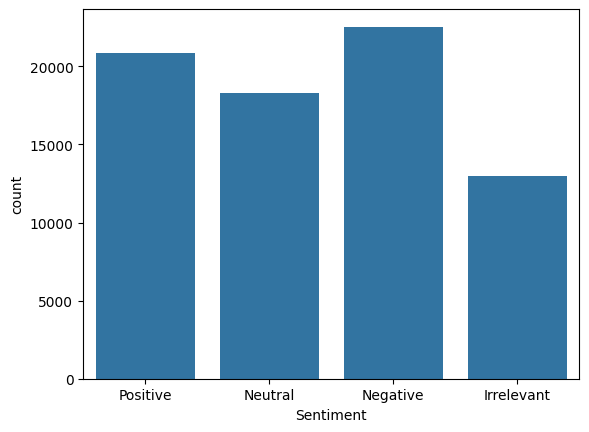

In [21]:
sns.countplot(x = 'Sentiment', data = df)
plt.show()

<Axes: ylabel='count'>

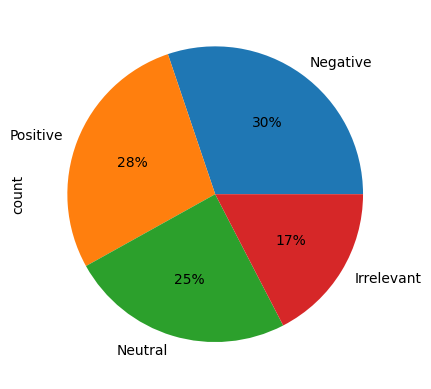

In [22]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')



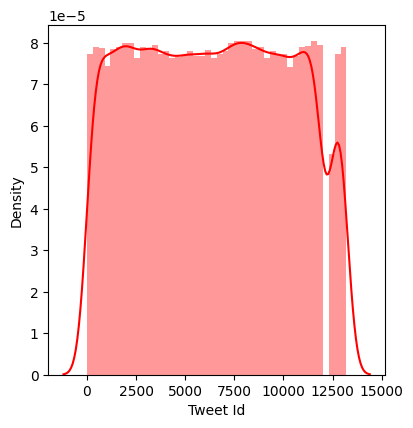

In [23]:

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    sns.distplot(df[col], label=col, color='red')


<Axes: xlabel='Tweet Id', ylabel='Count'>

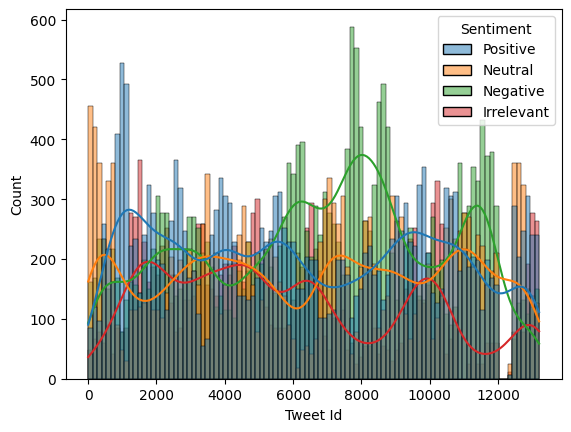

In [24]:
sns.histplot(x=col, hue='Sentiment', data=df, color='green', bins=100, kde=True)


<Axes: xlabel='Tweet Id', ylabel='Density'>

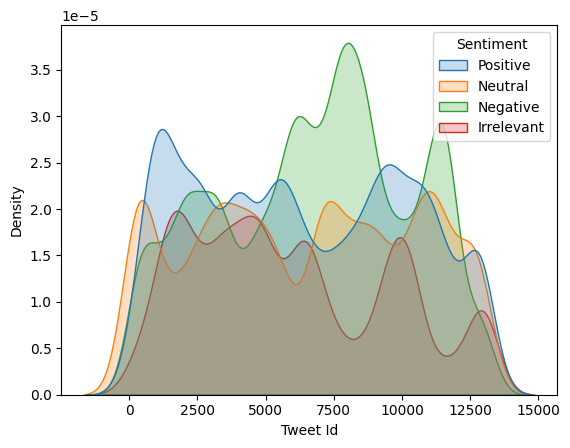

In [25]:
sns.kdeplot(data=df, x=col, hue='Sentiment', fill=True)

In [26]:
pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS


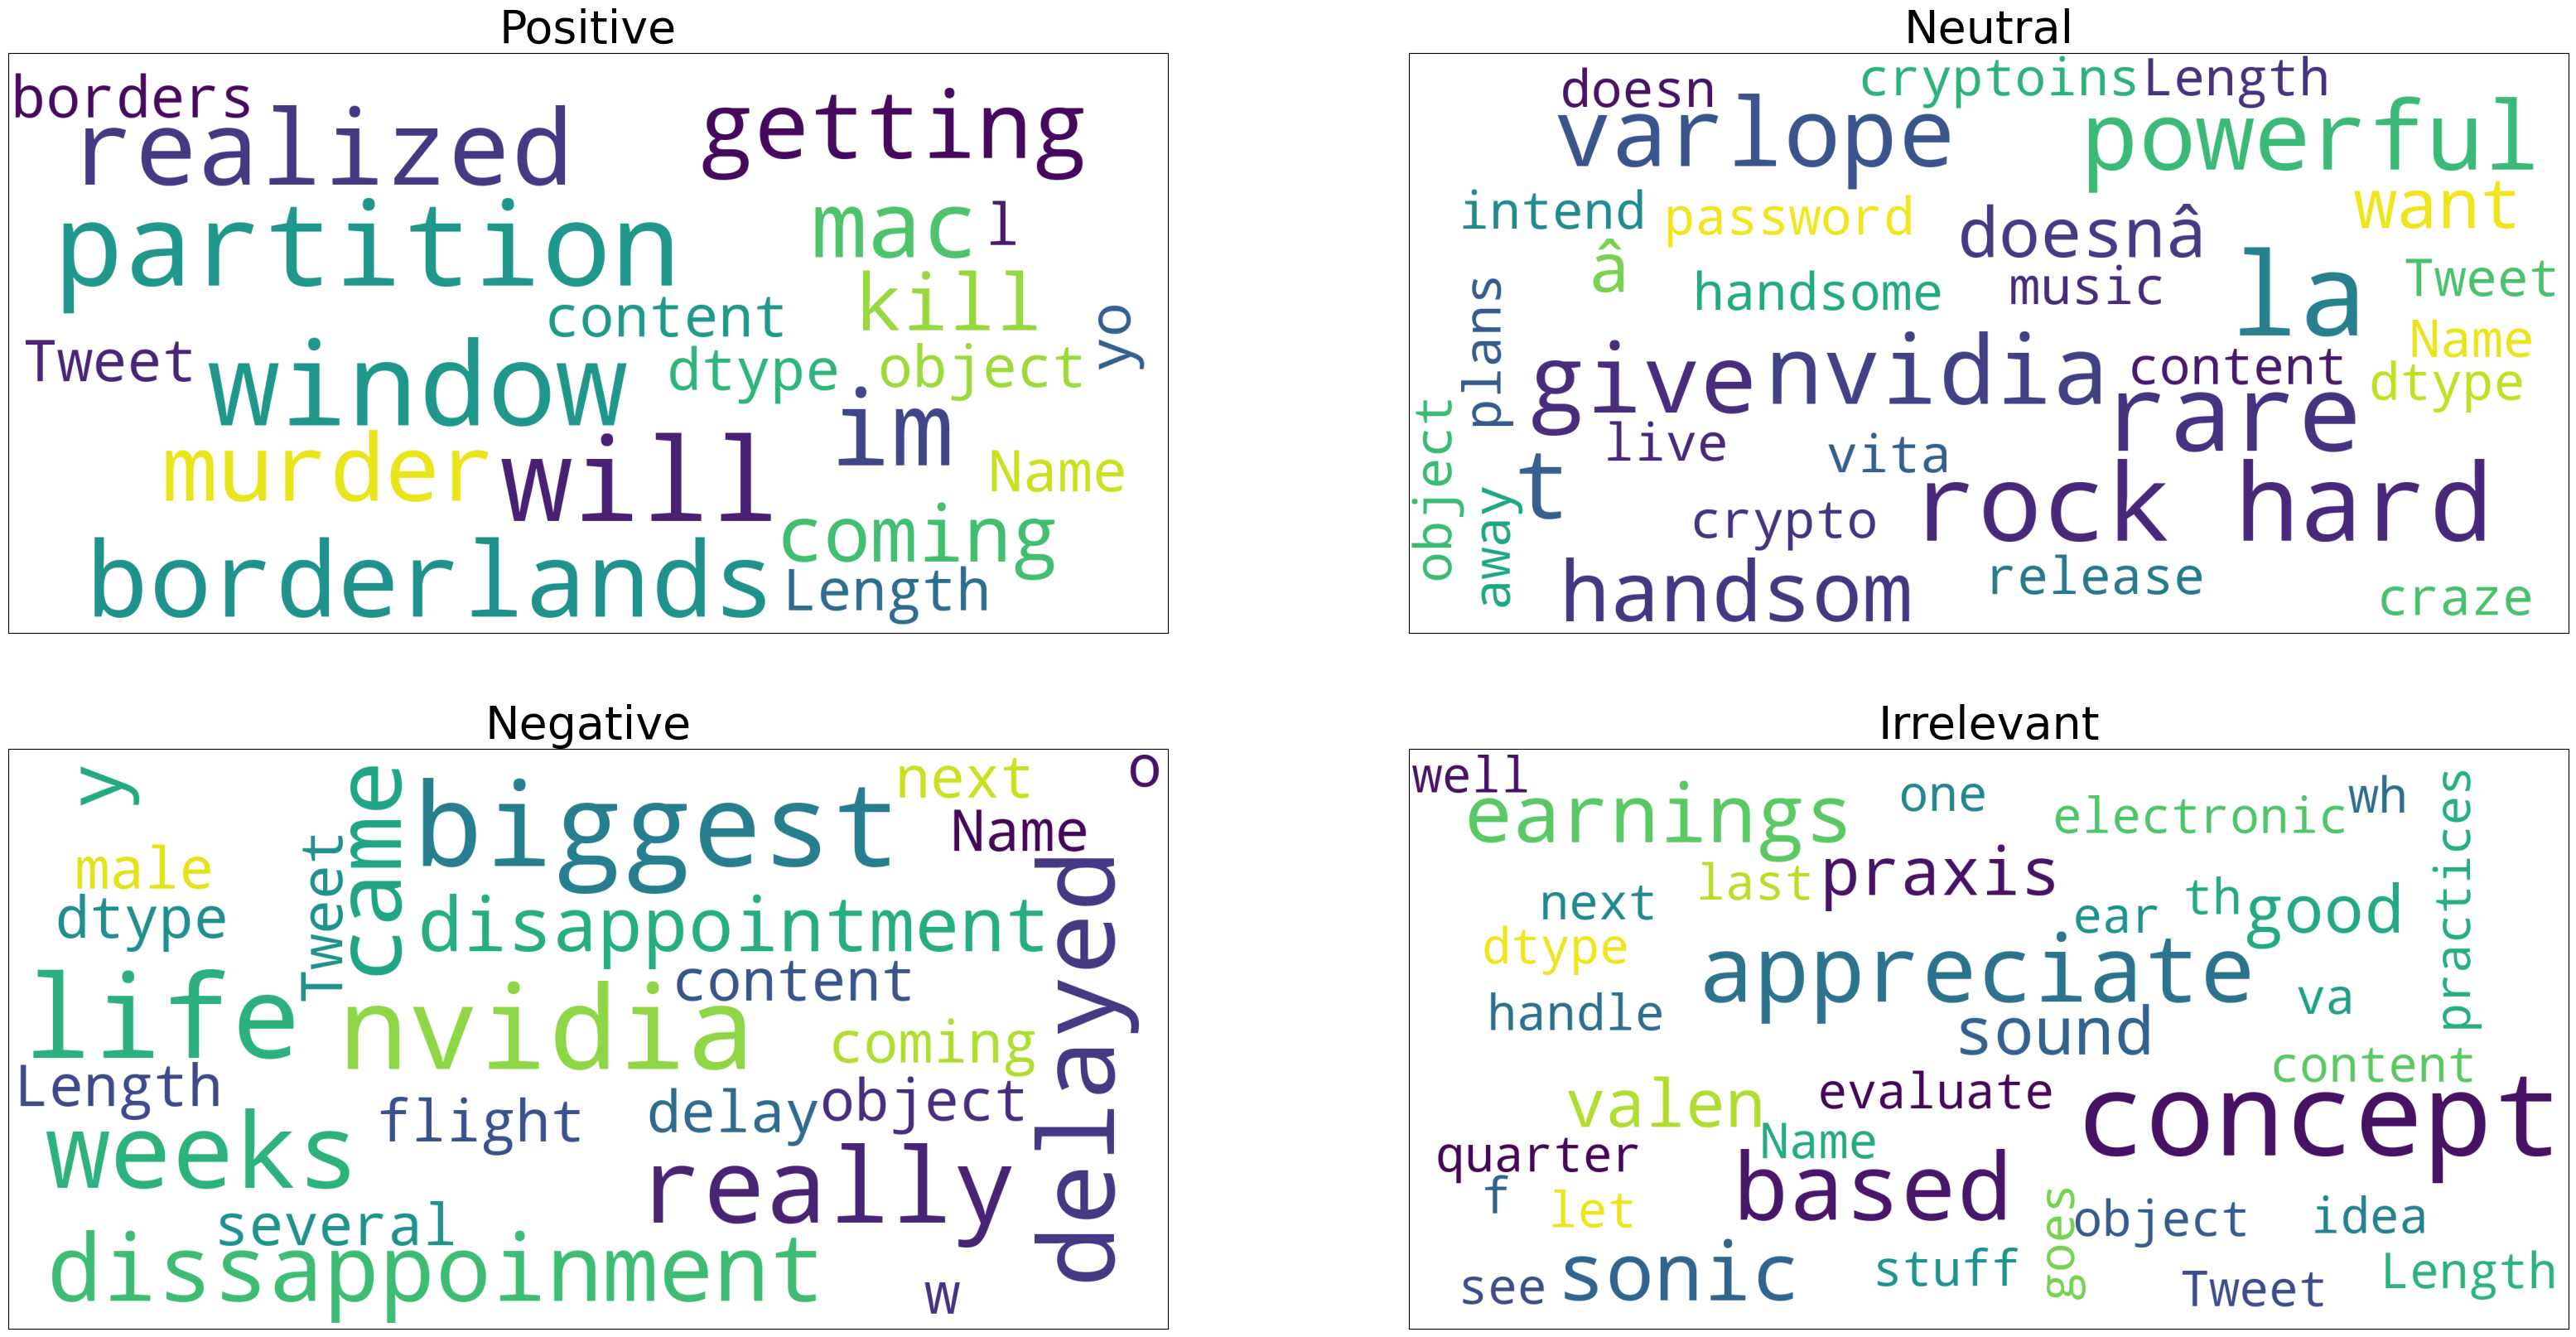

<Figure size 640x480 with 0 Axes>

In [28]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['Sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['Sentiment']==col]
    data = df1['Tweet content']
    wordcloud = WordCloud(background_color='white', max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [29]:
df

,Tweet Id,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Sentiment']=encoder.fit_transform(df['Sentiment'])
df.head()

,Tweet Id,Entity,Sentiment,Tweet content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,i am coming to the borders and i will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...


In [31]:
df['Sentiment'].value_counts()
# 0-->Irrelevant
# 1--> Negative
# 2-->Positive
# 3-->Neutral

Sentiment
1    22542
3    20832
2    18318
0    12990
Name: count, dtype: int64

In [32]:
# Stemming
# it is the process of reducing a word to its root word

In [33]:
df['stemmed_content']=df['Tweet content'].apply(preprocess)
df.head()

,Tweet Id,Entity,Sentiment,Tweet content,stemmed_content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,i am coming to the borders and i will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [34]:
#Example
print(preprocess("there is a king who is ruling india for the longst server of all time"))


king rule india longst server time


In [35]:
print(df['stemmed_content'])

0                                  m get borderland murder
1                                         come border kill
2                                    m get borderland kill
3                                 m come borderland murder
4                                m get borderland 2 murder
                               ...                        
74677    realize window partition mac like 6 year nvidi...
74678    realize mac window partition 6 year nvidia dri...
74679    realize window partition mac 6 year nvidia dri...
74680    realize window partition mac like 6 year nvidi...
74681    like window partition mac like 6 year driver i...
Name: stemmed_content, Length: 74682, dtype: object


In [36]:
print(df["Sentiment"])

0        3
1        3
2        3
3        3
4        3
        ..
74677    3
74678    3
74679    3
74680    3
74681    3
Name: Sentiment, Length: 74682, dtype: int64


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Sentiment']=encoder.fit_transform(df['Sentiment'])
df.head()

,Tweet Id,Entity,Sentiment,Tweet content,stemmed_content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,i am coming to the borders and i will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [38]:
# Separating data and label

X=df['stemmed_content'].values
y=df['Sentiment'].values


In [39]:
print(X)

['m get borderland murder' 'come border kill' 'm get borderland kill' ...
 'realize window partition mac 6 year nvidia driver idea didnâ\x80\x99t notice'
 'realize window partition mac like 6 year nvidia driver car fucking idea didn â\x80\x99 t notice'
 'like window partition mac like 6 year driver idea didnâ\x80\x99t notice']


In [40]:
print(y)

[3 3 3 ... 3 3 3]


In [41]:
# Spliting the data to training data and test data

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2)

In [43]:
print(X.shape,X_train.shape,X_test.shape)

(74682,) (52277,) (22405,)


In [44]:
print(y.shape,y_train.shape,y_test.shape)


(74682,) (52277,) (22405,)


In [45]:
print(X_train)

['crazy luxury brand properly sell southern canada uk 1894 disappear shelf overnight consistent rumour bad press partly blame decision say sue johnson johnson lnkd gnhm qr'
 'league legend suck play rogue company way well'
 'cod board 30 min call slur imagineable user 5 n word screenname yeah nb war criminal'
 ... 'sony say fuck straight away edge'
 'terrible facebook moderator force return office week buzzfeednews.com article ryanma'
 'take mi tio home hardware change supply break house   iâ\x80\x99m cry   miss dad']


In [46]:
print(X_test)

['congrat bro know 3 â½ hour 43 minute e finger cross'
 'new game mode call liferun add fortnite soon hopefully showcase pax east 7 day new mode play red star worker help save life child 4 different mission via)@adamgrenade m sure'
 'iâ\x80\x99m excited cyberpunk 2077 come grime world' ...
 'nice wifi router' '@wykrhm know way slow @dota2 try fool'
 'facebook bag contain damage verizon ad boycott wsj wsj.com/articles/faceb']


In [47]:
print(y_train)

[1 1 1 ... 1 2 3]


In [48]:
print(y_test)

[3 3 3 ... 1 2 2]


In [49]:
# converting textual data to numerical data
vectorizer=TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test = vectorizer.transform(X_test)

In [50]:
print(X_train)

  (0, 18599)	0.24602399577409675
  (0, 10415)	0.24602399577409675
  (0, 14156)	0.2092866905853803
  (0, 12920)	0.23882499087957154
  (0, 22108)	0.1878279715190596
  (0, 20221)	0.1220367210204615
  (0, 6844)	0.1696167400069907
  (0, 3956)	0.18042838563340854
  (0, 17276)	0.26295421463617624
  (0, 18147)	0.17634806576127549
  (0, 3339)	0.11015662658598906
  (0, 19924)	0.21020850348543443
  (0, 5909)	0.208398405683444
  (0, 17055)	0.21786963414872532
  (0, 20720)	0.22206710121325635
  (0, 7283)	0.20159079102967964
  (0, 319)	0.24225884340760293
  (0, 23886)	0.15163956904350714
  (0, 4754)	0.17089775265698015
  (0, 21449)	0.2389973200753358
  (0, 20480)	0.1362971024439913
  (0, 18318)	0.18672589844442986
  (0, 4316)	0.17034050089475403
  (0, 14421)	0.2389973200753358
  (0, 6232)	0.14698787474741104
  :	:
  (52274, 20221)	0.3235212858566922
  (52275, 19994)	0.4314404934887166
  (52275, 15426)	0.3946080600236562
  (52275, 4619)	0.3881226832008445
  (52275, 16625)	0.3021671485444645
  (52275,

In [51]:
print(X_test)

  (0, 26249)	0.46288291333673376
  (0, 15273)	0.27282382319253917
  (0, 13456)	0.20643105792689567
  (0, 11640)	0.24708817931441465
  (0, 9200)	0.38512108570601994
  (0, 6302)	0.3225468616084642
  (0, 5872)	0.33447007237520343
  (0, 4418)	0.277923156416877
  (0, 1124)	0.40764442990126465
  (1, 25447)	0.19356398303751962
  (1, 24569)	0.2567431130633087
  (1, 22212)	0.16003672182098785
  (1, 21740)	0.17794429765336423
  (1, 21388)	0.16994030615451788
  (1, 20829)	0.23140332612298736
  (1, 20211)	0.17405420653285142
  (1, 19058)	0.1287047930801396
  (1, 17756)	0.09526993515164534
  (1, 17361)	0.24658089717487694
  (1, 16078)	0.22661077581688518
  (1, 15418)	0.33581775364355376
  (1, 15322)	0.18481819003272645
  (1, 13977)	0.2781271909723025
  (1, 13970)	0.14700347479300174
  (1, 11587)	0.19715127727448917
  :	:
  (22400, 24601)	0.748234700726264
  (22400, 14236)	0.6634341207905108
  (22401, 11515)	0.5404664615302093
  (22401, 3989)	0.8413655590532658
  (22402, 25245)	0.5833964914542538
  

Training the Machine Learning Model

Logistic Regression

In [52]:
model=LogisticRegression(max_iter=1000)


In [53]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [54]:
# Accuracy score on the training data

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [55]:
print("Accuracy score on the training data:",training_data_accuracy)

Accuracy score on the training data: 0.8382080073454865


In [78]:
# Accuracy score on the test data

X_train_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_train_prediction,y_test)

In [79]:
print("Accuracy score on the test data:", test_data_accuracy)

Accuracy score on the test data: 0.7622852041954921


In [60]:
# Saving the trained model

import pickle
filename="trained_model.pkl"
pickle.dump(model,open(filename,'wb'))

In [61]:
# Using the saved model for future predictions
loaded_model=pickle.load(open('/content/trained_model.pkl','rb'))